# Project:User Knowledge Modeling

- ***Estimation of students' knowledge status about the subject of Electrical DC Machines.***


**Attribute Information:**

- STG (The degree of study time for goal object materails), (input value) 
- SCG (The degree of repetition number of user for goal object materails) (input value) 
- STR (The degree of study time of user for related objects with goal object) (input value) 
- LPR (The exam performance of user for related objects with goal object) (input value) 
- PEG (The exam performance of user for goal objects) (input value) 
- UNS (The knowledge level of user) (target value) 
  - Very Low: 50 
  - Low:129 
  - Middle: 122 
  - High 130

**Abstract:**

We develop a statistical machine learning framework to study the effect of eight input variables (relative compactness, surface area, wall area, roof area, overall height, orientation, glazing area, glazing area distribution) on two output variables, namely heating load (HL) and cooling load (CL), of residential buildings. We systematically investigate the association strength of each input variable with each of the output variables using a variety of classical and non-parametric statistical analysis tools, in order to identify the most strongly related input variables. Then, we compare a classical linear regression approach against a powerful state of the art nonlinear non-parametric method, random forests, to estimate HL and CL. Extensive simulations on 768 diverse residential buildings show that we can predict HL and CL with low mean absolute error deviations from the ground truth which is established using Ecotect (0.51 and 1.42, respectively). The results of this study support the feasibility of using machine learning tools to estimate building parameters as a convenient and accurate approach, as long as the requested query bears resemblance to the data actually used to train the mathematical model in the first place.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2

In [2]:
import seaborn as sns

In [3]:
dataset=pd.read_excel('Book1.xlsx')
dataset.columns=['STG','SCG','STR','LPR','PEG','UNS']
dataset.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,0
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,0
4,0.08,0.08,0.08,0.98,0.24,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258 entries, 0 to 257
Data columns (total 6 columns):
STG    258 non-null float64
SCG    258 non-null float64
STR    258 non-null float64
LPR    258 non-null float64
PEG    258 non-null float64
UNS    258 non-null int64
dtypes: float64(5), int64(1)
memory usage: 12.2 KB


>**Data Preprocessing**
 - Categorical Data
 - Label Encoder


In [5]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [6]:
dataset['UNS']=le.fit_transform(dataset['UNS'])
dataset.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,0
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,0
4,0.08,0.08,0.08,0.98,0.24,0


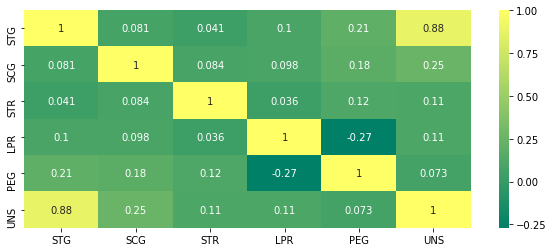

In [7]:
corr=dataset.corr()
plt.figure(figsize=(10,4))
sns.heatmap(corr,annot=True,cmap='summer')
plt.show()

In [8]:
x=dataset.iloc[:,0:5].values # Independant variables
y=dataset.iloc[:,-1].values #dependant variables
x.shape,y.shape

((258, 5), (258,))

In [9]:
print(x)

[[0.   0.   0.   0.   0.  ]
 [0.08 0.08 0.1  0.24 0.9 ]
 [0.06 0.06 0.05 0.25 0.33]
 ...
 [0.54 0.82 0.71 0.29 0.77]
 [0.5  0.75 0.81 0.61 0.26]
 [0.66 0.9  0.76 0.87 0.74]]


>**Feature Scaling**
- Standard Scaler
- Min Max Scaler

In [10]:
from sklearn.preprocessing import  StandardScaler,MinMaxScaler
sc=StandardScaler() #z-score
mms=MinMaxScaler() #(0-1)->normalisation

In [11]:
x_sc =sc.fit_transform(x)
x_norm=mms.fit_transform(x)

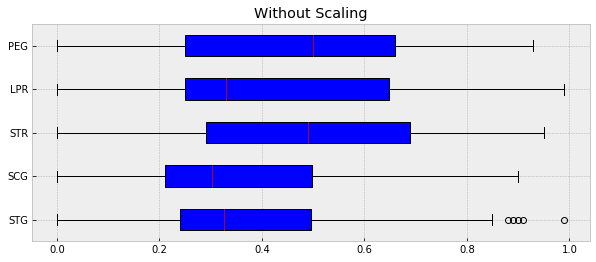

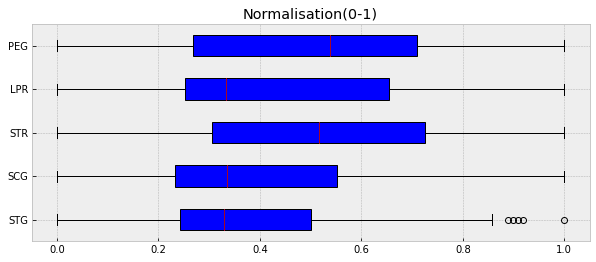

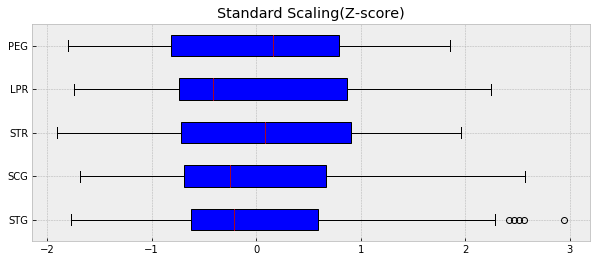

In [12]:
fig=plt.figure(figsize=(10,4))
plt.style.use('bmh')

# Without scaling
plt.boxplot(x,vert=False,labels=['STG','SCG','STR','LPR','PEG'],patch_artist=True)
plt.title('Without Scaling')
plt.show()

# Normalisation
fig=plt.figure(figsize=(10,4))
plt.boxplot(x_norm,vert=False,labels=['STG','SCG','STR','LPR','PEG'],patch_artist=True)
plt.title('Normalisation(0-1)')
plt.show()

# Standard scaling
fig=plt.figure(figsize=(10,4))
plt.boxplot(x_sc,vert=False,labels=['STG','SCG','STR','LPR','PEG'],patch_artist=True)
plt.title('Standard Scaling(Z-score)')
plt.show()



fig=plt.figure(figsize=(8,6))
plt.scatter(x[:,0],x[:,1],c=y)


plt.xlabel('Sepal Width') , plt.ylabel('Petal Width')
plt.show()

In [13]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sc,y,test_size=0.2,random_state=0)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

C:\Program Files\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


((206, 5), (206,), (52, 5), (52,))

>**Building machine learning model**
- LogisticRegression
- KNeighborsClassifier
- Support Vector Machine
- DecisionTreeClassifier
- RandomForestClassifier


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [15]:
model_log= LogisticRegression(C=10.0) # class
model_knn= KNeighborsClassifier(n_neighbors=3)
model_svm= SVC(kernel='rbf')
model_dt= DecisionTreeClassifier()
model_rf= RandomForestClassifier(n_estimators=100)

In [16]:
model_log.fit(x_train,y_train)
model_knn.fit(x_train,y_train)
model_svm.fit(x_train,y_train)
model_dt.fit(x_train,y_train)
model_rf.fit(x_train,y_train)
print('Model trained successfully')

Model trained successfully


> Model Evaluation(How good is my model)
- Confusion Matrix
- Classification Report

In [17]:
y_pred_log=model_log.predict(x_test)
y_pred_knn=model_knn.predict(x_test)
y_pred_svm=model_svm.predict(x_test)
y_pred_dt=model_dt.predict(x_test)
y_pred_rf=model_rf.predict(x_test)

In [18]:
from sklearn.metrics import confusion_matrix,classification_report

In [19]:
cm_log= confusion_matrix(y_test,y_pred_log)
cm_knn= confusion_matrix(y_test,y_pred_knn)
cm_svm= confusion_matrix(y_test,y_pred_svm)
cm_dt= confusion_matrix(y_test,y_pred_dt)
cm_rf= confusion_matrix(y_test,y_pred_rf)

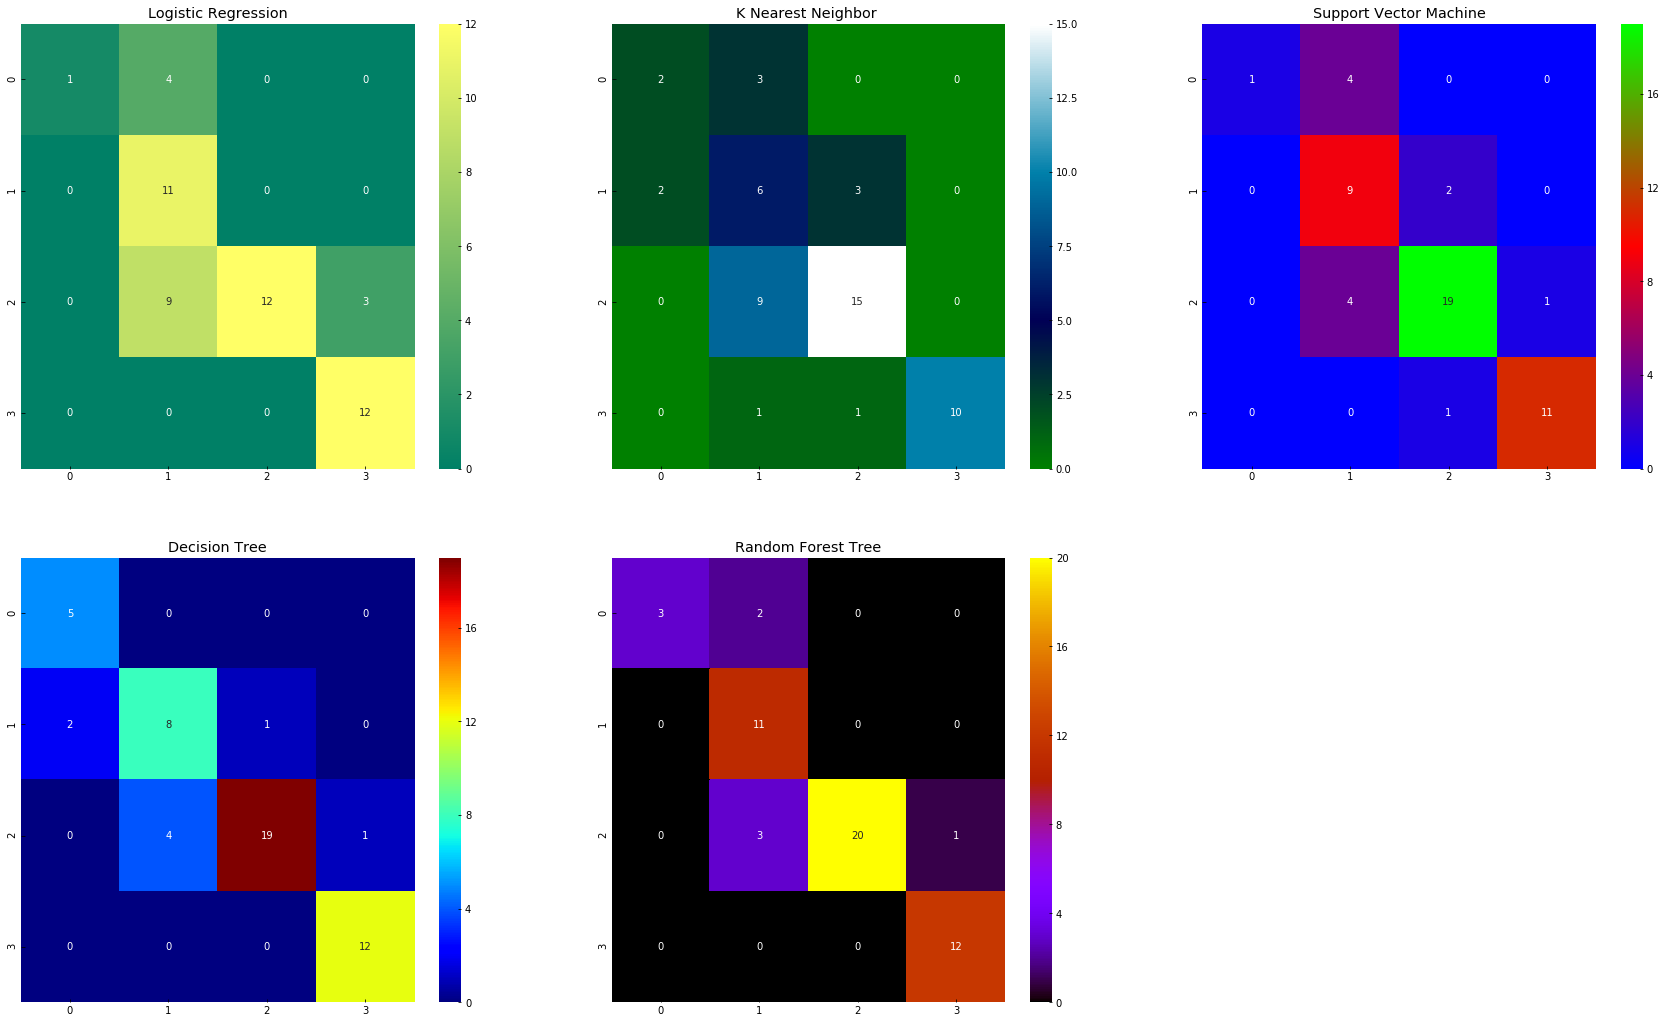

In [20]:
fig=plt.figure(figsize=(30,18))

plt.subplot(2,3,1)
sns.heatmap(cm_log,annot=True,cmap='summer')
plt.title('Logistic Regression')

plt.subplot(2,3,2)
sns.heatmap(cm_knn,annot=True,cmap='ocean')
plt.title('K Nearest Neighbor ')

plt.subplot(2,3,3)
sns.heatmap(cm_svm,annot=True,cmap='brg',)
plt.title('Support Vector Machine')

plt.subplot(2,3,4)
sns.heatmap(cm_dt,annot=True,cmap='jet',)
plt.title('Decision Tree')

plt.subplot(2,3,5)
sns.heatmap(cm_rf,annot=True,cmap='gnuplot',)
plt.title('Random Forest Tree')
plt.show()

In [21]:
cr_log=classification_report(y_test,y_pred_log)
cr_knn=classification_report(y_test,y_pred_knn)
cr_svm=classification_report(y_test,y_pred_svm)
cr_dt=classification_report(y_test,y_pred_dt)
cr_rf=classification_report(y_test,y_pred_rf)

In [22]:
print("*"*20+'Logistic Regression'+"*"*20)
print(cr_log)

print("*"*20+'K Nearest Neighbor'+"*"*20)
print(cr_knn)

print("*"*20+'Support Vector Machine'+"*"*20)
print(cr_svm)

print("*"*20+'Decision tree'+"*"*20)
print(cr_dt)

print("*"*20+'Random Forest'+"*"*20)
print(cr_rf)

********************Logistic Regression********************
             precision    recall  f1-score   support

          0       1.00      0.20      0.33         5
          1       0.46      1.00      0.63        11
          2       1.00      0.50      0.67        24
          3       0.80      1.00      0.89        12

avg / total       0.84      0.69      0.68        52

********************K Nearest Neighbor********************
             precision    recall  f1-score   support

          0       0.50      0.40      0.44         5
          1       0.32      0.55      0.40        11
          2       0.79      0.62      0.70        24
          3       1.00      0.83      0.91        12

avg / total       0.71      0.63      0.66        52

********************Support Vector Machine********************
             precision    recall  f1-score   support

          0       1.00      0.20      0.33         5
          1       0.53      0.82      0.64        11
          2     